# 缺失值占比

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import os
import pandas as pd
from tqdm.notebook import tqdm, tnrange
import matplotlib.pyplot as plt
import seaborn as sns
tqdm.pandas()

file_dir="../SHL2023/data_pkl"
all_file_list=os.listdir(file_dir)
all_pkl_list=sorted(all_file_list)[1:]# remove ipynb_checkpoints

names=[]
for i in tnrange(len(all_pkl_list)):
    names.append(all_pkl_list[i][:-4])

  0%|          | 0/28 [00:00<?, ?it/s]

In [4]:
for name in tqdm(names):
    print('------------------Loading {} ------------------'.format(name + '.pkl'))
    df = pd.read_pickle(file_dir + '/' + name + '.pkl')
    a=df.isnull().sum() / df.shape[0]
    print(a)

  0%|          | 0/28 [00:00<?, ?it/s]

------------------Loading bag_acc_full.pkl ------------------
time     0.000000e+00
Acc_x    4.079450e-08
Acc_y    4.079450e-08
Acc_z    4.079450e-08
dtype: float64
------------------Loading bag_gps_detail_full.pkl ------------------
time         0.0
id           0.0
snr          0.0
azimuth      0.0
elevation    0.0
dtype: float64
------------------Loading bag_gps_full.pkl ------------------
time      0.0
number    0.0
dtype: float64
------------------Loading bag_gyr_full.pkl ------------------
time     0.000000e+00
Gyr_x    1.937739e-07
Gyr_y    1.937739e-07
Gyr_z    1.937739e-07
dtype: float64
------------------Loading bag_label_full.pkl ------------------
time     0.0
label    0.0
dtype: float64
------------------Loading bag_loc_full.pkl ------------------
time         0.0
accuracy     0.0
latitude     0.0
longitude    0.0
altitude     0.0
dtype: float64
------------------Loading bag_mag_full.pkl ------------------
time     0.000000e+00
Mag_x    2.141711e-07
Mag_y    2.141711e-07
M

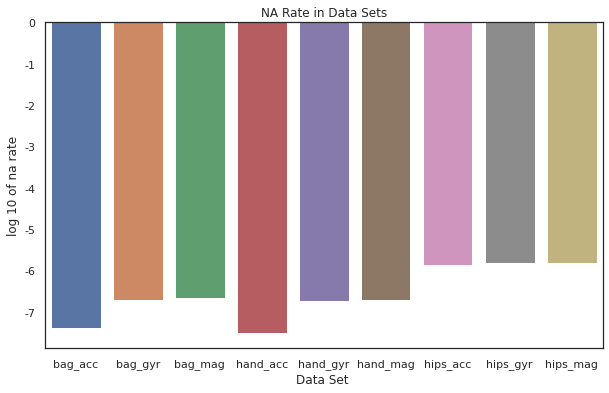

In [16]:
x_data=['bag_acc','bag_gyr','bag_mag','hand_acc','hand_gyr','hand_mag','hips_acc','hips_gyr','hips_mag']
y_data=[-7.389398,-6.712705,-6.669239,-7.514337,-6.736186,-6.712705,-5.874187,-5.827106,-5.824141]#取对数

 
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"]=False
 
sns.set_theme(style="white")    
plt.figure(figsize=(10,6))    
sns.barplot(x=x_data,y=y_data)
plt.title("NA Rate in Data Sets")
plt.xlabel("Data Set ")
plt.ylabel("log 10 of na rate")
plt.savefig('rate')
plt.show()






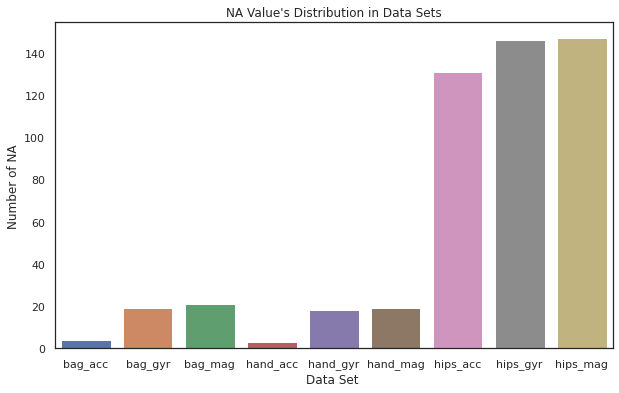

In [18]:
x_data=['bag_acc','bag_gyr','bag_mag','hand_acc','hand_gyr','hand_mag','hips_acc','hips_gyr','hips_mag']
y_data=[4,19,21,3,18,19,131,146,147]

import matplotlib.pyplot as plt
 
plt.rcParams["font.sans-serif"]=['SimHei']
plt.rcParams["axes.unicode_minus"]=False
 
plt.figure(figsize=(10,6))    
sns.barplot(x=x_data,y=y_data)
plt.title("NA Value's Distribution in Data Sets")
plt.xlabel("Data Set ")
plt.ylabel("Number of NA")
plt.savefig('total NA number')
plt.show()





In [29]:
df = pd.read_pickle('/home/dengjiebi/SHL2023/data_pkl/bag_label_full.pkl')
df['time1']=df['time']-df['time'][0]#相对时间

In [30]:
df.groupby('label').count()

,time,time1
label,,
1,12229754,12229754
2,12276890,12276890
3,4227716,4227716
4,11740364,11740364
5,15869847,15869847
6,14164261,14164261
7,15625987,15625987
8,11917619,11917619


In [31]:
df['label_change']=df['label'].shift(-1) - df['label']

In [45]:
q3 = df.loc[df['label_change']!=0].copy()

In [46]:
q3

,time,label,time1,label_change
48005,1490432062810,4,480050,3.0
765011,1490440147760,7,8565000,-5.0
790578,1490440702800,2,9120040,-1.0
900088,1490442217820,1,10635060,7.0
972191,1490443537420,8,11954660,-7.0
...,...,...,...,...
97013023,1499253182330,5,8821599570,-3.0
97197563,1499256076950,2,8824494190,-1.0
97385036,1499258057070,1,8826474310,1.0
97635463,1499261386980,2,8829804220,3.0


In [52]:
q3.loc[:,'index1']=list(q3.index)

In [57]:
duration=q3['index1'].diff()
duration

In [139]:
duration[48005]=48005
duration

48005        48005.0
765011      717006.0
790578       25567.0
900088      109510.0
972191       72103.0
              ...   
97013023    347950.0
97197563    184540.0
97385036    187473.0
97635463    250427.0
98052437    416974.0
Name: index1, Length: 628, dtype: float64

In [140]:
q3['duration']=duration/100
q3['duration'].describe()

count      628.000000
mean      1561.344538
std       2044.682020
min          0.140000
25%        345.022500
50%        862.475000
75%       1953.670000
max      23536.230000
Name: duration, dtype: float64

In [66]:
q3['time_diff']=q3['time1'].diff()
q3.loc[48005,'time_diff']=480050
q3['time_diff']=q3['time_diff'].map(lambda x : x/1000)
q3['time_diff'].describe()

count    6.280000e+02
mean     1.407049e+04
std      8.015802e+04
min      7.480000e+01
25%      5.391850e+02
50%      1.379870e+03
75%      3.769160e+03
max      1.730980e+06
Name: time_diff, dtype: float64

In [141]:
q3[['duration','time_diff']]

,duration,time_diff
48005,480.05,480.05
765011,7170.06,8084.95
790578,255.67,555.04
900088,1095.10,1515.02
972191,721.03,1319.60
...,...,...
97013023,3479.50,7395.52
97197563,1845.40,2894.62
97385036,1874.73,1980.12
97635463,2504.27,3329.91


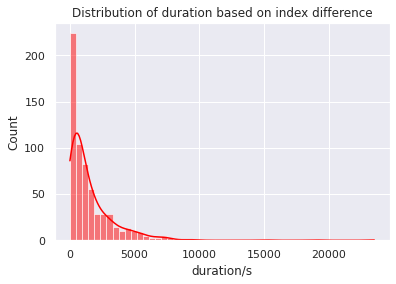

means of duration: 1561.345 s


In [142]:
sns.set_theme()
sns.histplot(data=q3['duration'], bins=50,kde=True,color='red') 
plt.title("Distribution of duration based on index difference")
plt.xlabel("duration/s")
plt.show()
print('means of duration: {:.3f} s'.format(q3['duration'].mean()))

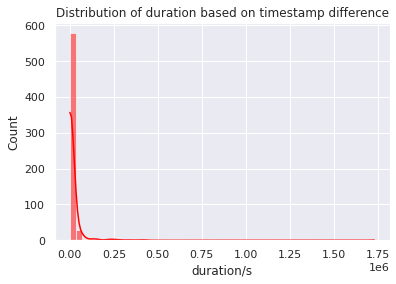

means of duration: 14070.493 s


In [135]:
sns.set_theme()
sns.histplot(data=q3['time_diff'], bins=50,kde=True,color='red') 
plt.title("Distribution of duration based on timestamp difference")
plt.xlabel("duration/s")
plt.show()
print('means of duration: {:.3f} s'.format(q3['time_diff'].mean()))

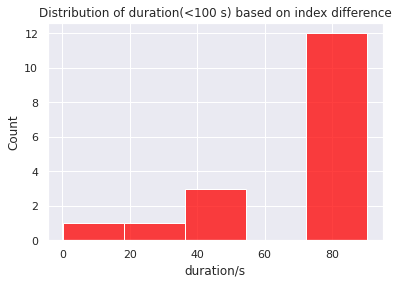

In [153]:
sns.set_theme()
sns.histplot(data=q3.loc[q3['duration']<100,'duration'], bins=5,color='red') 
plt.title("Distribution of duration(<100 s) based on index difference")
plt.xlabel("duration/s")
plt.show()

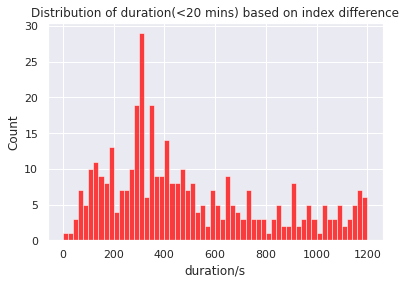

In [148]:
sns.set_theme()
sns.histplot(data=q3.loc[q3['duration']<1200,'duration'], bins=60,color='red') 
plt.title("Distribution of duration(<20 mins) based on index difference")
plt.xlabel("duration/s")
plt.show()

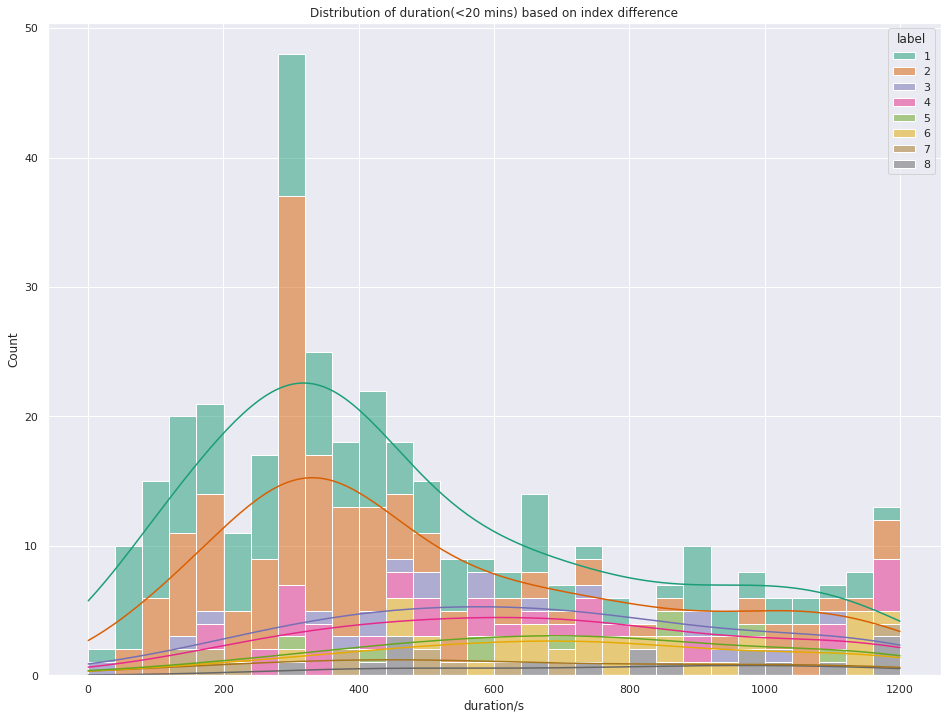

In [152]:
sns.set_theme()
plt.figure(figsize=(16, 12))
sns.histplot(data=q3.loc[q3['duration']<1200],
             x='duration',
             hue='label',
             multiple="stack",
             bins=30,
             kde=True,
             palette='Dark2')
plt.title("Distribution of duration(<20 mins) based on index difference")
plt.xlabel("duration/s")
plt.show()

In [ ]:
sns.set_theme()
plt.figure(figsize=(16, 12))
sns.histplot(q3,
             x='duration',
             hue='label',
             multiple="stack",
             bins=50,
             kde=True,
             palette='Dark2')
plt.title("Distribution of duration based on index difference")
plt.xlabel("duration/s")
plt.show()

Label: Still=1, Walking=2, Run=3, Bike=4, Car=5, Bus=6, Train=7, Subway=8